# Weighting Word Importance

You want a bag of words, but with words weighted by their importance to an observa‐
tion

Compare the frequency of the word in a document (a tweet, movie review, speech
transcript, etc.) with the frequency of the word in all other documents using term
frequency-inverse document frequency (tf-idf). scikit-learn makes this easy with
TfidfVectorizer

In [1]:
# Load libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
# Create text
text_data = np.array(['I love Brazil. Brazil!',
 'Sweden is best',
'Germany beats both'])
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)
# Show tf-idf feature matrix
feature_matrix

<3x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [2]:
# Show tf-idf feature matrix as dense matrix
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

In [3]:
# Show feature names
tfidf.vocabulary_

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

The more a word appears in a document, the more likely it is important to that docu‐
ment. For example, if the word economy appears frequently, it is evidence that the
document might be about economics. We call this term frequency (tf).

In contrast, if a word appears in many documents, it is likely less important to any
individual document. For example, if every document in some text data contains the
word aer then it is probably an unimportant word. We call this document frequency
(df)

By combining these two statistics, we can assign a score to every word representing
how important that word is in a document. Specifically, we multiply tf to the inverse
of document frequency (idf):
> tf‐idf( t, d) = t f( t, d) × id f (t)

where t is a word and d is a document. There are a number of variations in how tf and
idf are calculated. In scikit-learn, tf is simply the number of times a word appears in
the document and idf is calculated as:





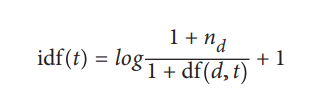








where nd is the number of documents and df(d,t) is term, t’s document frequency (i.e.,
number of documents where the term appears).


By default, scikit-learn then normalizes the tf-idf vectors using the Euclidean norm
(L2 norm). The higher the resulting value, the more important the word is to a docu‐
ment.